<a href="https://colab.research.google.com/github/Tiya4425/Practice/blob/main/K_train%2Bdistilbert%2Bdisaster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ktrain is a lightweight wrapper library for TensorFlow Keras. It can be very helpful in building projects consisting of neural networks. Using this wrapper, we can build, train and deploy deep learning and machine learning models

In [ ]:
!pip3 install ktrain

     |████████████████████████████████| 25.3 MB 1.4 MB/s 
     |████████████████████████████████| 22.3 MB 69.1 MB/s 
     |████████████████████████████████| 981 kB 54.9 MB/s 
     |████████████████████████████████| 263 kB 63.6 MB/s 
     |████████████████████████████████| 2.8 MB 46.4 MB/s 
     |████████████████████████████████| 1.2 MB 46.9 MB/s 
     |████████████████████████████████| 468 kB 53.7 MB/s 
     |████████████████████████████████| 596 kB 41.2 MB/s 
     |████████████████████████████████| 3.3 MB 47.5 MB/s 
     |████████████████████████████████| 84 kB 3.5 MB/s 
     |████████████████████████████████| 880 kB 35.8 MB/s 
  Created wheel for ktrain: filename=ktrain-0.31.0-py3-none-any.whl size=25312260 sha256=f1de09cf718457606f27940caf3312db23306e0ddfb99738ab63c7ea38f6bc2b
  Stored in directory: /root/.cache/pip/wheels/da/51/15/f25a223a50ac222ac2bde2c9d52a2a6c5352c46ac7e4625b85
  Created wheel for keras-bert: filename=keras_bert-0.89.0-py3-none-any.whl size=33517 sha256=0aa799c7

In [ ]:
import ktrain
from ktrain import text
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv("disaster.csv")
df = df.drop(['id','keyword','location'],axis=1)
random_seed = 12342
x_train, x_val, y_train, y_val = train_test_split(df['text'], df['target'], shuffle=True, test_size = 0.2, random_state=random_seed, stratify=df['target'])

In [ ]:
import numpy as np
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)
x_val = np.asarray(x_val)
y_val = np.asarray(y_val)

Convert data to features for BERT

In [ ]:
(x_train_bert,  y_train_bert), (x_val_bert, y_val_bert), preproc = text.texts_from_array(x_train=x_train, y_train=y_train,
                                                                                         x_test = x_val, y_test=y_val,
                                                                                          class_names= ["0", "1"],
                                                                                          preprocess_mode='bert',
                                                                                          lang = 'en',
                                                                                          maxlen=65, 
                                                                                          max_features=35000)

downloading pretrained BERT model (uncased_L-12_H-768_A-12.zip)...
[██████████████████████████████████████████████████]
extracting pretrained BERT model...
done.

cleanup downloaded zip...
done.

preprocessing train...
language: en


Is Multi-Label? False
preprocessing test...
language: en


task: text classification


 Load the BERT Model

In [ ]:
MODEL_NAME = 'distilbert-base-uncased'  # replace this with model of choice
t = text.Transformer(MODEL_NAME, maxlen=65, class_names= ["0", "1"])
trn = t.preprocess_train(x_train, y_train)
val = t.preprocess_test(x_val, y_val)
model = t.get_classifier()
learner = ktrain.get_learner(model, train_data=trn, val_data=val, batch_size=6)


Downloading:   0%|          | 0.00/483 [00:00<?, ?B/s]

preprocessing train...
language: en
train sequence lengths:
	mean : 17
	95percentile : 24
	99percentile : 26


Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Is Multi-Label? False
preprocessing test...
language: en
test sequence lengths:
	mean : 17
	95percentile : 24
	99percentile : 27


Downloading:   0%|          | 0.00/363M [00:00<?, ?B/s]

applying learning rate =2e-5. the ktrain Learning Rate Finder can be used to find a good learning rate by invoking learner.lr_find() and learner.lr_plot(), prior to training. The learner.fit_onecycle method employs a 1cycle learning rate policy.

We can use the learner.validate method to test our model against the validation set.

In [ ]:
learner.fit_onecycle(2e-5, 4)
learner.validate(class_names=t.get_classes())



begin training using onecycle policy with max lr of 2e-05...
Epoch 1/4
1516/1516 [==============================] - 120s 71ms/step - loss: 0.3076 - accuracy: 0.8810 - val_loss: 0.2735 - val_accuracy: 0.8879
Epoch 2/4
1516/1516 [==============================] - 111s 72ms/step - loss: 0.2027 - accuracy: 0.9212 - val_loss: 0.2268 - val_accuracy: 0.9085
Epoch 3/4
1516/1516 [==============================] - 110s 72ms/step - loss: 0.1076 - accuracy: 0.9626 - val_loss: 0.2451 - val_accuracy: 0.9156
Epoch 4/4
1516/1516 [==============================] - 110s 71ms/step - loss: 0.0375 - accuracy: 0.9889 - val_loss: 0.2982 - val_accuracy: 0.9164
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1851
           1       0.78      0.76      0.77       423

    accuracy                           0.92      2274
   macro avg       0.87      0.86      0.86      2274
weighted avg       0.92      0.92      0.92      2274



array([[1763,   88],
       [ 102,  321]])

In [ ]:
learner.lr_find()

simulating training for different learning rates... this may take a few moments...
Epoch 1/1024
1516/1516 [==============================] - 48s 30ms/step - loss: 0.0357 - accuracy: 0.9896


/usr/local/lib/python3.7/dist-packages/ktrain/lroptimize/lrfinder.py:267: UserWarning: Shape of array too small to calculate a numerical gradient, at least (edge_order + 1) elements are required.
  warnings.warn(str(e))




done.
Please invoke the Learner.lr_plot() method to visually inspect the loss plot to help identify the maximal learning rate associated with falling loss.


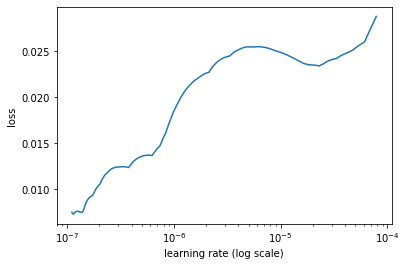

In [ ]:
learner.lr_plot()

https://medium.com/analytics-vidhya/finetuning-bert-using-ktrain-for-disaster-tweets-classification-18f64a50910b
https://github.com/amaiya/ktrain/blob/master/tutorials/tutorial-04-text-classification.ipynb
https://stackoverflow.com/questions/63729057/how-to-use-another-pretrained-bert-model-with-the-ktrain-text-classifier
https://colab.research.google.com/drive/1_R6a_CoxucQ9fWlHZcqTptw9wvmIq8UM#scrollTo=iUwfalUy-x2_

How to Use Our Trained BERT Model earner.get_predictor method to obtain a Predictor object capable of making predictions on new raw data.

In [ ]:
predictor = ktrain.get_predictor(learner.model, t)

In [ ]:
predictor.get_classes()

['0', '1']

In [ ]:
x_val[0]

'The dems, were for Iran last week, when Iran attacked our embassy in Iraq. They cried and said, gr… https://t.co/qg7IPz2ssB'

In [ ]:
predictor.predict((x_val[0:1]))

['1']

In [ ]:
df.head()

,text,target
0,"Communal violence in Bhainsa, Telangana. ""Ston...",1
1,Telangana: Section 144 has been imposed in Bha...,1
2,Arsonist sets cars ablaze at dealership https:...,1
3,Arsonist sets cars ablaze at dealership https:...,1
4,"""Lord Jesus, your love brings freedom and pard...",0


In [ ]:
df.shape

(11370, 2)

In [ ]:
df['target from prediction']=predictor.predict(df['text'].tolist())

In [ ]:
df.head()

,text,target,target from prediction
0,"Communal violence in Bhainsa, Telangana. ""Ston...",1,1
1,Telangana: Section 144 has been imposed in Bha...,1,1
2,Arsonist sets cars ablaze at dealership https:...,1,1
3,Arsonist sets cars ablaze at dealership https:...,1,1
4,"""Lord Jesus, your love brings freedom and pard...",0,0
